In [13]:
%matplotlib notebook

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import mpl_toolkits.axes_grid1.inset_locator as mpl_il
import matplotlib.animation as animation

<IPython.core.display.Javascript object>


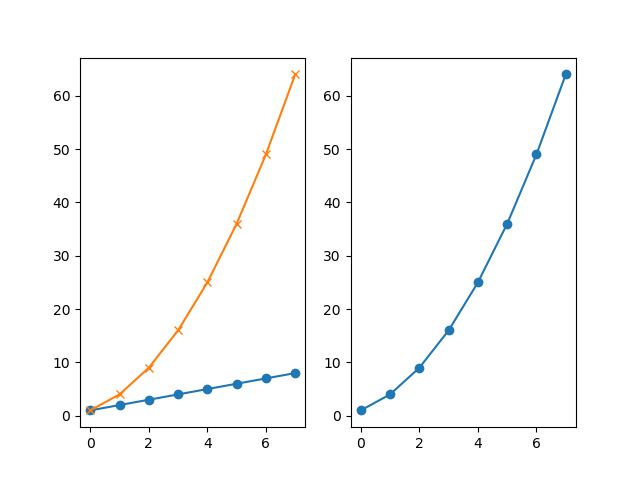

In [2]:
plt.figure()
plt.subplot(1, 2, 1) #1 row 2 column and col 1

linear_data = np.array(range(1, 9))

plt.plot(linear_data, '-o')

In [3]:
expo_data = linear_data**2

plt.subplot(1, 2, 2)
plt.plot(expo_data, '-o')

In [4]:
plt.subplot(1, 2, 1)
plt.plot(expo_data, '-x')

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  """Entry point for launching an IPython kernel.


<IPython.core.display.Javascript object>


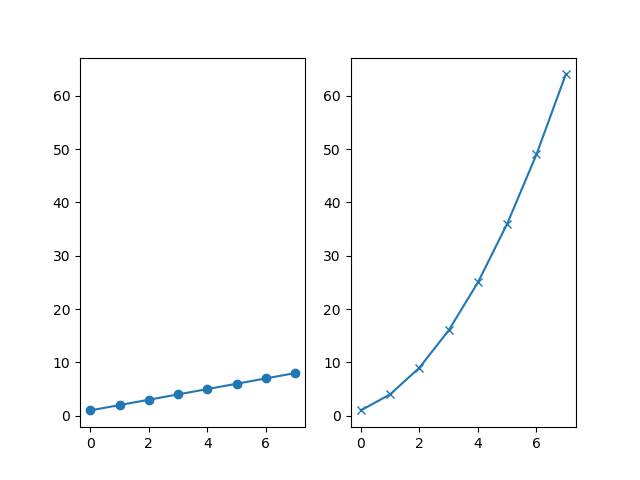

In [5]:
#locking the axes

plt.figure()

ax1 = plt.subplot(1, 2, 1)
plt.plot(linear_data, '-o')

ax2 = plt.subplot(1, 2, 2, sharey = ax1)
plt.plot(expo_data, '-x')

<IPython.core.display.Javascript object>


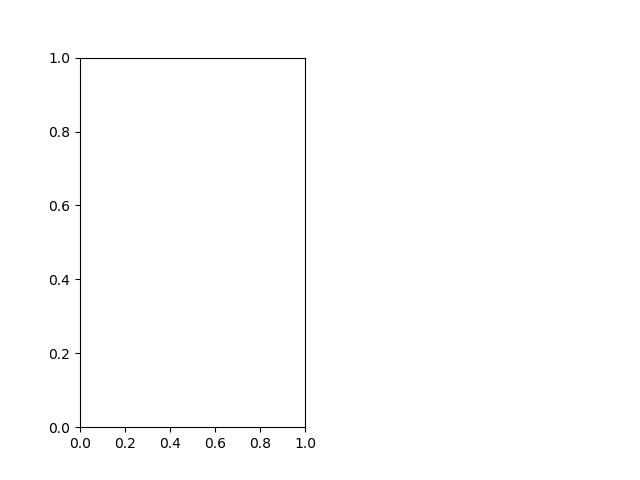

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  This is separate from the ipykernel package so we can avoid doing imports until


True

In [6]:
plt.figure()

plt.subplot(1, 2, 1) == plt.subplot(121)

<IPython.core.display.Javascript object>


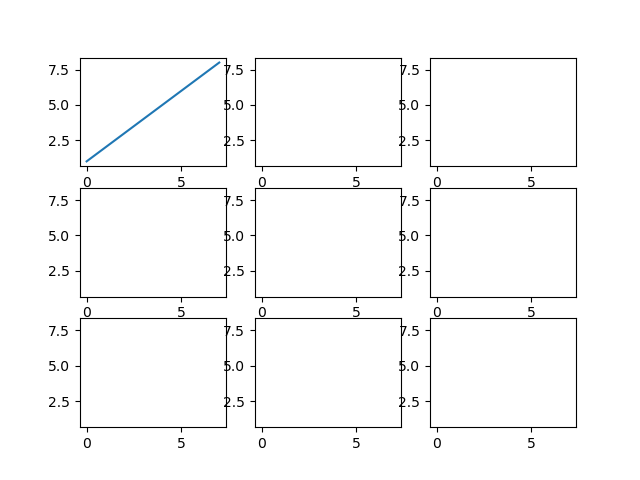

In [7]:
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6), (ax7, ax8, ax9)) = plt.subplots(3, 3, sharex = True, sharey = True)

In [8]:
ax1.plot(linear_data, '-')

In [9]:
# set inside tick labels to visible
for ax in plt.gcf().get_axes():
    ax.xaxis.set_tick_params(labelbottom=True)
    ax.yaxis.set_tick_params(labelleft=True)

In [10]:
# necessary on some systems to update the plot

plt.gcf().canvas.draw()

<IPython.core.display.Javascript object>


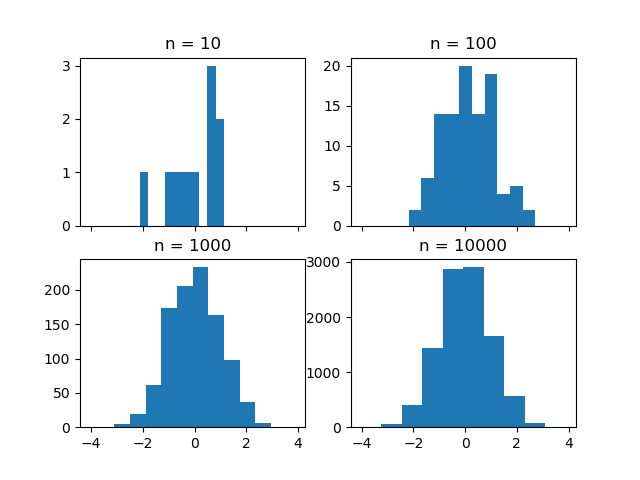

In [11]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, sharex = True)

axs = [ax1, ax2, ax3, ax4]

for n in range(0, len(axs)):
    sample_size = 10**(n+1)
    sample = np.random.normal(loc = 0.0, scale = 1.0, size = sample_size)
    axs[n].hist(sample)
    axs[n].set_title('n = {}'.format(sample_size))

<IPython.core.display.Javascript object>


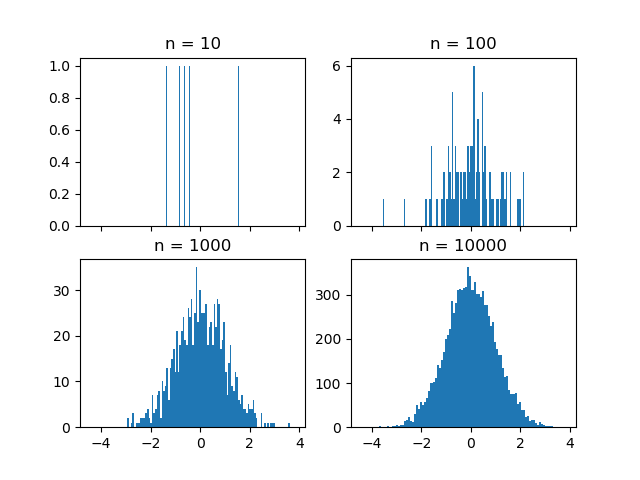

In [12]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, sharex = True)

axs = [ax1, ax2, ax3, ax4]

for n in range(0, len(axs)):
    sample_size = 10**(n+1)
    sample = np.random.normal(loc = 0.0, scale = 1.0, size = sample_size)
    axs[n].hist(sample, bins = 100)
    axs[n].set_title('n = {}'.format(sample_size))

<IPython.core.display.Javascript object>


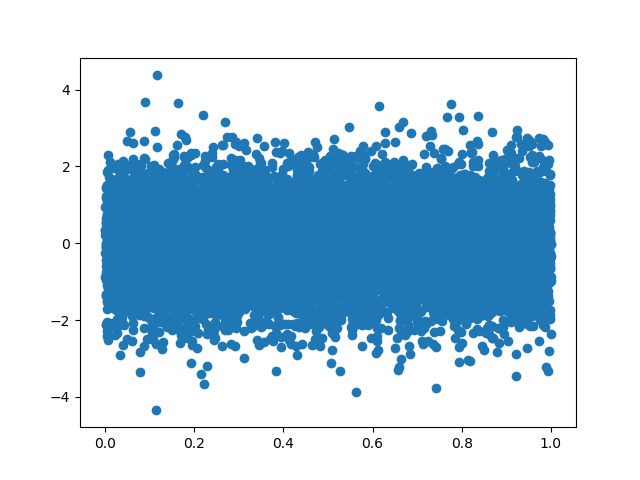

In [42]:
plt.figure()

Y = np.random.normal(loc = 0.0, scale = 1.0, size = 10000)
X = np.random.random(size = 10000)

plt.scatter(X, Y)

<IPython.core.display.Javascript object>


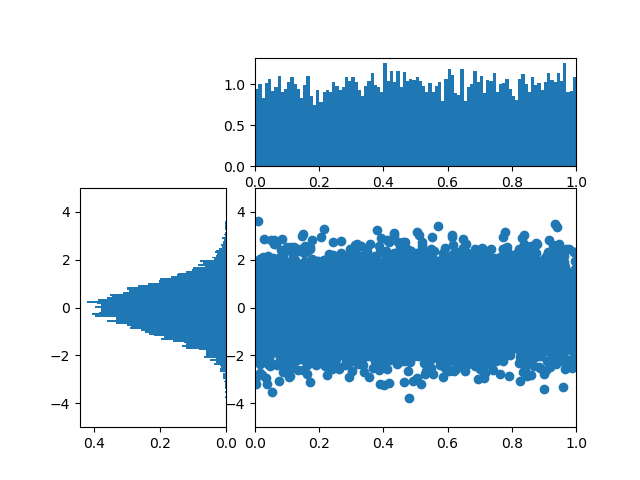

In [14]:
plt.figure()

gspec = gridspec.GridSpec(3, 3)

top_histogram = plt.subplot(gspec[0, 1:])
side_histogram = plt.subplot(gspec[1:, 0])
lower_right = plt.subplot(gspec[1:, 1:])

In [15]:
lower_right.scatter(X, Y)
top_histogram.hist(X, bins = 100)
s = side_histogram.hist(Y, bins = 100, orientation = 'horizontal')

In [16]:
top_histogram.clear()
top_histogram.hist(X, bins = 100, normed = True) #normed true means scale the frequency data between 0 and 1

side_histogram.clear()
side_histogram.hist(Y, bins = 100, orientation = 'horizontal', normed = True)

side_histogram.invert_xaxis()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  """


In [17]:
for ax in [top_histogram, lower_right]:
    ax.set_xlim(0, 1)
    
for ax in [side_histogram, lower_right]:
    ax.set_ylim(-5, 5)

In [18]:
normal_sample = np.random.normal(loc = 0.0, scale = 1.0, size = 10000)
random_sample = np.random.random(size = 10000)
gamma_sample = np.random.gamma(2, size = 10000)

df = pd.DataFrame({'Normal' : normal_sample, 
                   'Random' : random_sample, 
                   'Gamma' : gamma_sample})


In [19]:
df.describe()

,Normal,Random,Gamma
count,10000.000000,10000.000000,10000.000000
mean,0.008485,0.499409,2.002402
std,1.001584,0.288428,1.416961
min,-3.882942,0.000058,0.003765
25%,-0.666979,0.250257,0.958077
50%,0.001350,0.498920,1.664866
75%,0.702180,0.750057,2.727883
max,4.149825,0.999716,11.100545


<IPython.core.display.Javascript object>


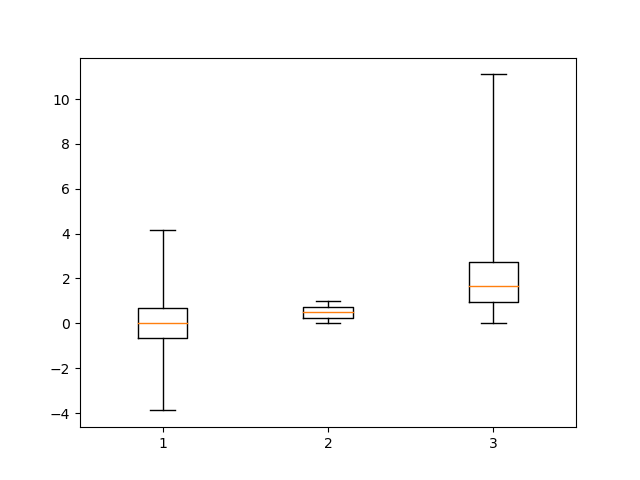

In [20]:
plt.figure()

_ = plt.boxplot(df['Normal'], whis = 'range')

In [21]:
plt.clf()

_ = plt.boxplot([ df['Normal'], df['Random'], df['Gamma'] ], whis = 'range')

<IPython.core.display.Javascript object>


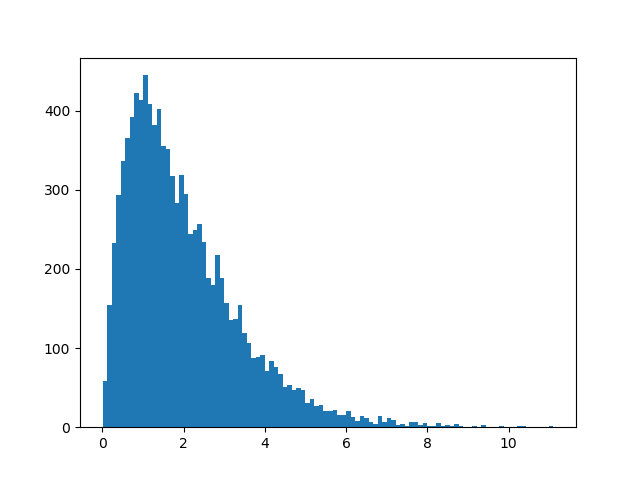

In [22]:
plt.figure()

_ = plt.hist(df['Gamma'], bins = 100) #long tail

<IPython.core.display.Javascript object>


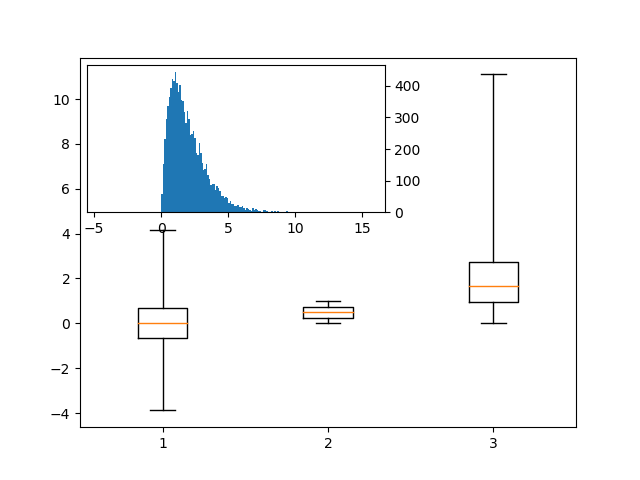

In [23]:
plt.figure() #plot fig on another one

plt.boxplot([df['Normal'], df['Random'], df['Gamma']], whis = 'range')

# overlay axis on top of another 
ax2 = mpl_il.inset_axes(plt.gca(), width = '60%', height = '40%', loc = 2)
ax2.hist(df['Gamma'], bins = 100)
ax2.margins(x = .5)

In [39]:
ax2.yaxis.tick_right()

In [14]:
plt.figure() #plot fig on another one

# if `whis` argument isn't passed, boxplot defaults to showing 1.5*interquartile (IQR) whiskers with outliers
_ = plt.boxplot([df['Normal'], df['Random'], df['Gamma']])

<IPython.core.display.Javascript object>

NameError: name 'df' is not defined

<IPython.core.display.Javascript object>


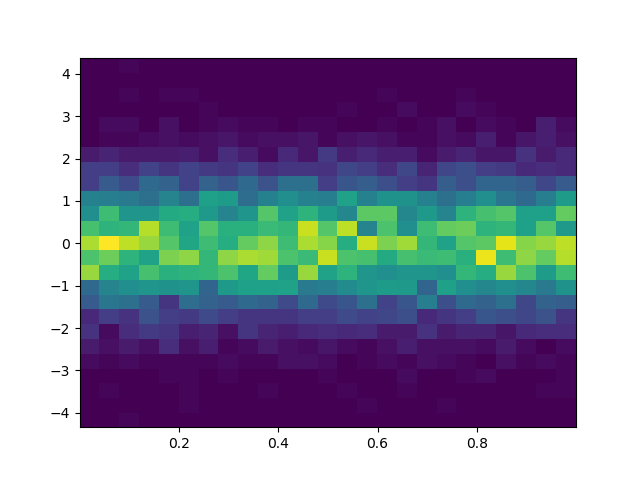

In [44]:
plt.figure()

_ = plt.hist2d(X, Y, bins = 25)

<IPython.core.display.Javascript object>


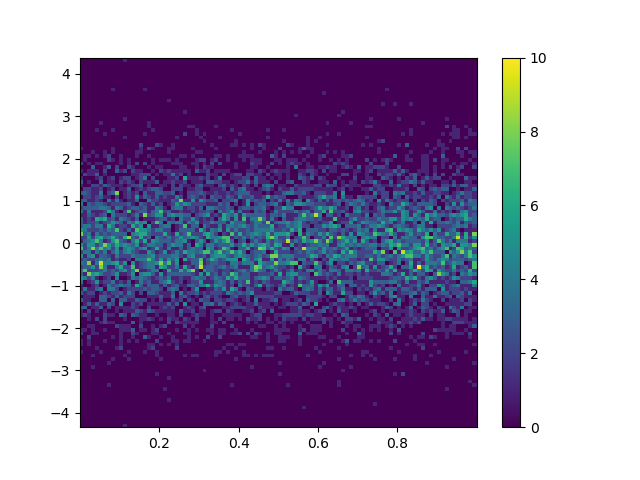

In [45]:
plt.figure()

_ = plt.hist2d(X, Y, bins = 100)

In [46]:
plt.colorbar()

In [19]:
n = 100
x = np.random.randn(n)
x

array([ 3.23854073e-01,  8.73991561e-01,  5.18956597e-01,  7.81520334e-02,
        9.59329404e-01, -1.26714581e+00,  9.77966377e-02, -1.31726891e+00,
       -3.39611824e-01,  8.42547640e-01,  1.75549883e+00, -1.40214049e+00,
       -9.55786290e-01,  1.31264294e+00, -1.30723349e+00, -3.54263210e+00,
       -1.85682183e-01,  8.07974118e-01, -1.21993293e+00,  3.69559844e-01,
        8.65530594e-01,  1.09998088e+00, -4.73632882e-01,  4.27039661e-01,
        2.88515338e-01,  1.55445202e+00,  1.34630695e+00,  1.44718590e+00,
        3.60381917e-02, -2.16209394e-01, -1.14271361e+00, -1.95495963e-01,
       -1.08332760e+00,  1.91029849e+00,  5.20824732e-01, -1.51241366e+00,
       -1.92613453e+00,  9.12070703e-01, -1.47810409e+00,  1.53676183e+00,
       -2.53735006e-02,  1.61821658e+00, -4.66351954e-01, -7.92822335e-01,
        3.57298666e-01,  1.73994452e+00,  1.25649851e-01,  1.49616500e+00,
        1.91194863e+00, -6.00608047e-01,  1.17631934e+00,  1.10434699e+00,
       -5.99945588e-01, -

In [20]:
# create the function that will do the plotting, where curr is the current frame
def update(curr):
    # check if animation is at the last frame, and if so, stop the animation a
    if curr == n: 
        a.event_source.stop()
    plt.cla()
    bins = np.arange(-4, 4, 0.5)
    plt.hist(x[:curr], bins=bins)
    plt.axis([-4,4,0,30])
    plt.gca().set_title('Sampling the Normal Distribution')
    plt.gca().set_ylabel('Frequency')
    plt.gca().set_xlabel('Value')
    plt.annotate('n = {}'.format(curr), [3,27])

<IPython.core.display.Javascript object>


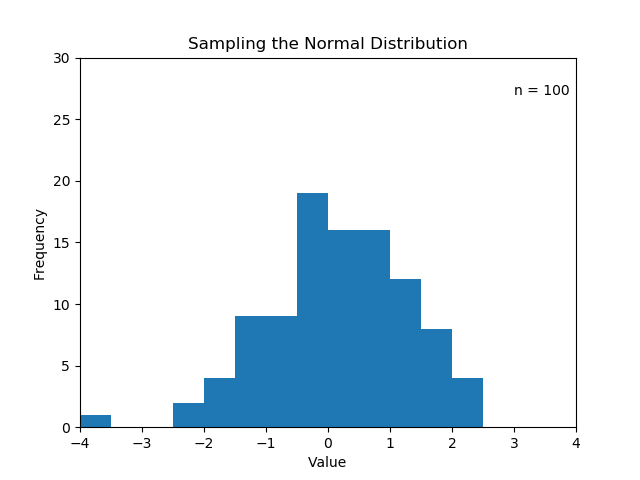

In [21]:
fig = plt.figure()

a = animation.FuncAnimation(fig, update, interval = 100)

<IPython.core.display.Javascript object>


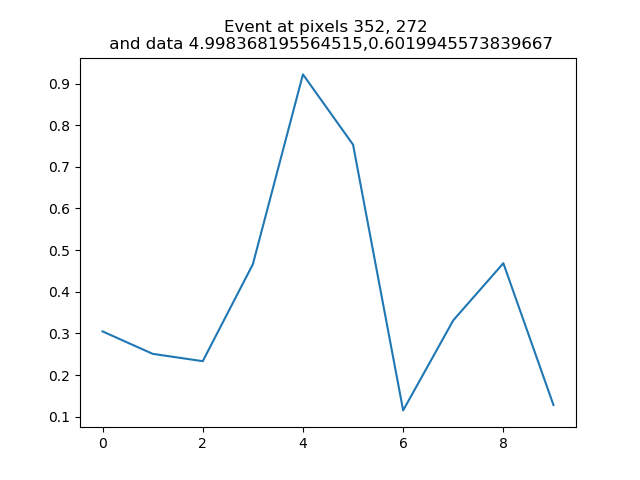

7

In [54]:
plt.figure()

data = np.random.rand(10)

plt.plot(data)

def onclick(event):
    plt.cla()
    plt.plot(data)
    plt.gca().set_title('Event at pixels {}, {} {} and data {},{}'.format(event.x, 
                                                                          event.y, 
                                                                          '\n', 
                                                                          event.xdata, 
                                                                          event.ydata))

# # tell mpl_connect we want to pass a 'button_press_event' into onclick when the event is detected
plt.gcf().canvas.mpl_connect('button_press_event', onclick)

In [55]:
from random import shuffle

origins = ['China', 'Brazil', 'India', 'USA', 'Canada', 'UK', 'Germany', 'Iraq', 'Chile', 'Mexico']

shuffle(origins)

df = pd.DataFrame({'Height' : np.random.rand(10),
                   'Weight' : np.random.rand(10), 
                   'Origin' : origins})
df

,Height,Weight,Origin
0,0.603348,0.784692,USA
1,0.083824,0.991988,Canada
2,0.971451,0.482307,Mexico
3,0.094176,0.718072,Germany
4,0.004107,0.282587,Brazil
5,0.604596,0.195537,India
6,0.601432,0.321951,UK
7,0.819837,0.108807,Iraq
8,0.220695,0.171885,China
9,0.916142,0.867092,Chile


<IPython.core.display.Javascript object>


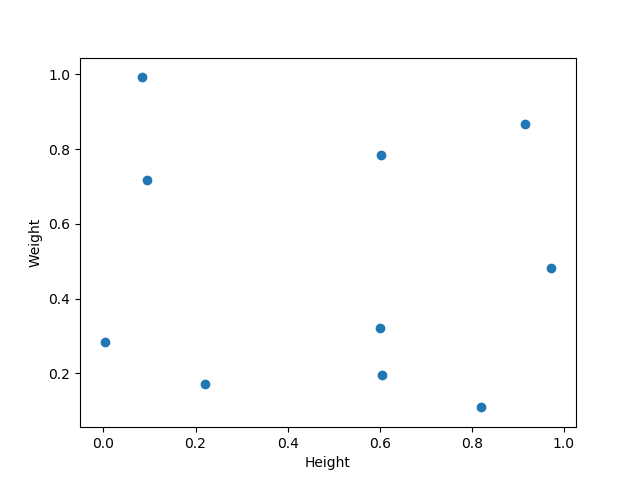

Text(0.5, 0, 'Height')

In [59]:
plt.figure()

# picker=5 means the mouse doesn't have to click directly on an event, but can be up to 5 pixels away
plt.scatter(df['Height'], df['Weight'], picker = 5)

plt.gca().set_ylabel("Weight")
plt.gca().set_xlabel("Height")

In [60]:
def onpick(event):
    origin = df.iloc[event.ind[0]]['origin']
    plt.gca().set_title('Selected item came from {}'.format(origin))

# tell mpl_connect we want to pass a 'pick_event' into onpick when the event is detected
plt.gcf().canvas.mpl_connect('pick_event', onpick)

7